In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('flight_price.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info

<bound method DataFrame.info of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → 

In [5]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.shape

(10683, 11)

In [8]:
pd.isnull(df).sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
pd.isnull(df).sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.shape

(10682, 11)

## EDA(FEATURE ENGINEERING)

In [12]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'],dayfirst=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  object        
 6   Arrival_Time     10682 non-null  object        
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1001.4+ KB


string date time converted to python date time object for date_of_journey column

In [14]:
df['Date']=df['Date_of_Journey'].dt.day
df['Month']=df['Date_of_Journey'].dt.month
df['Year']=df['Date_of_Journey'].dt.year

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [16]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [18]:
df['Year'].unique()

array([2019], dtype=int32)

since this dataset is only about 2019. so we can drop year column as well.

In [19]:
df.drop('Year',axis=1,inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [21]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'],dayfirst=True)

/var/folders/l_/90186wzj7s70kbqwql25xvtw0000gn/T/ipykernel_25253/3313352528.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time']=pd.to_datetime(df['Dep_Time'],dayfirst=True)


In [22]:
df['Dept_Hour']=df['Dep_Time'].dt.hour
df['Dept_Min']=df['Dep_Time'].dt.minute

In [23]:
df.drop('Dep_Time',axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Date             10682 non-null  int32 
 10  Month            10682 non-null  int32 
 11  Dept_Hour        10682 non-null  int32 
 12  Dept_Min         10682 non-null  int32 
dtypes: int32(4), int64(1), object(8)
memory usage: 1001.4+ KB


In [25]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'],dayfirst=True)

/var/folders/l_/90186wzj7s70kbqwql25xvtw0000gn/T/ipykernel_25253/1886136797.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'],dayfirst=True)


In [26]:
df['Arrival_hour']=df['Arrival_Time'].dt.hour
df['Arrival_minute']=df['Arrival_Time'].dt.minute

In [27]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [28]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dept_Hour,Dept_Min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [29]:
duration=list(df['Duration'])
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [30]:
duration=list(df['Duration'])
for i in range(len(duration)):
     print(len(duration[i].split()))

2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
1
2
2
2
2
1
2
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
1
2
2
2
1
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
1
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2


In [31]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else :
            duration[i]='0h ' +duration[i]

duration_hour=[]
duration_minute=[]
for i in range(len(duration)):
    duration_minute.append(duration[i].split(sep='m')[0].split()[-1])
    duration_hour.append(duration[i].split(sep='h')[0])

In [32]:
df['Duration_Hour']=duration_hour
df['Duration_Minute']=duration_minute

In [33]:
df['Duration_Minute']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_Minute, Length: 10682, dtype: object

In [34]:
df.drop('Duration',axis=1,inplace=True)

In [35]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Dept_Hour,Dept_Min,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

Two Types
Nominal Data- OneHotEncoder
Ordinal Data- LabelEncoder

In [36]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [37]:
#df=df.drop(df[df['Airline']=='Jet Airways'].index)  Jet airways is not into services.So we can delete corresponding rows.

In [38]:
df[df['Airline']=='Jet Airways'].index

Index([    2,     6,     7,     8,    13,    17,    19,    24,    25,    33,
       ...
       10657, 10658, 10663, 10666, 10667, 10668, 10672, 10673, 10674, 10680],
      dtype='int64', length=3849)

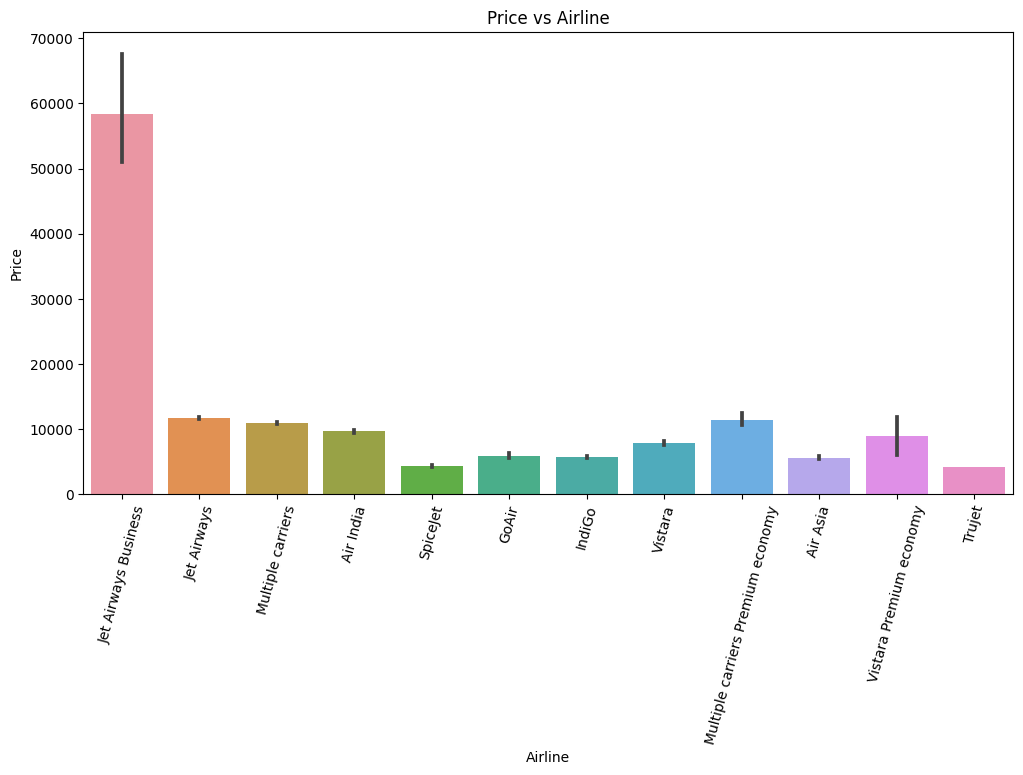

In [39]:
#which airline has the highest price =====Jet Airways Business
plt.figure(figsize=(12,6))
plt.title('Price vs Airline')
plt.xticks(rotation=75)
sns.barplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False));

In [40]:
#As Airline is nominal categorical data ====OneHotEncoding
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True,dtype=int)    #drop first column (indigo drop)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [41]:
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

<Axes: xlabel='Source', ylabel='Price'>

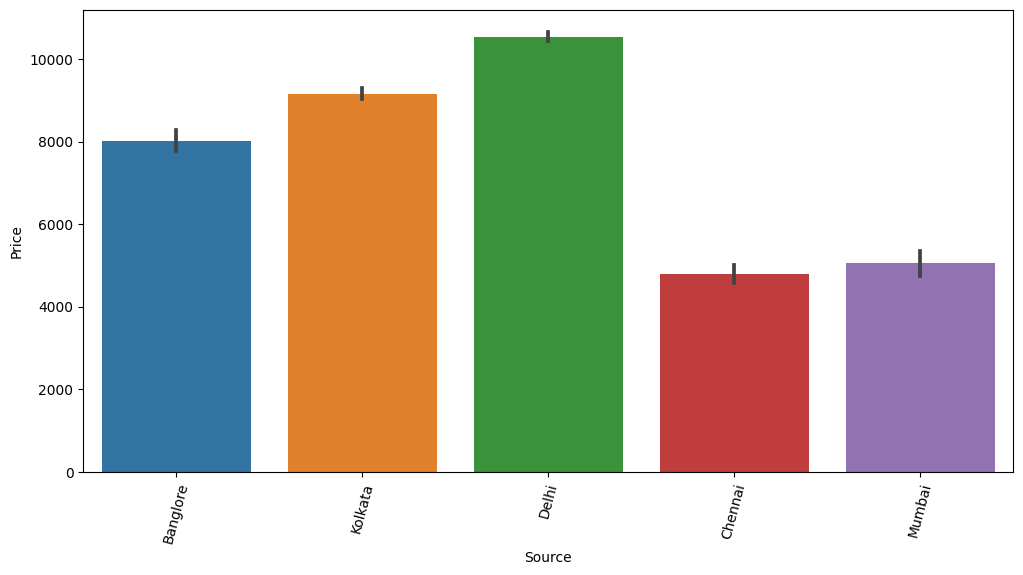

In [42]:
#Source vs Price
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x='Source',y='Price',data=df)

In [43]:
#As source is nominal categorical data====OneHotEncoding
Source=df[['Source']]
Source=pd.get_dummies(Source,drop_first=True,dtype=int)       #drop first column (bangalore drop)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [44]:
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [45]:
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True,dtype=int)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [46]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [47]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [48]:
df['Additional_Info'].count()   #df.shape

10682

In [49]:
8344/10682

0.781127129750983

In [50]:
#additional_Info has approx 80% no_info.
#Route and Stops are related to each other.
#So we can drop them
df.drop(columns=['Additional_Info','Route'],axis=1,inplace=True)

In [51]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [52]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dept_Hour,Dept_Min,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [53]:
#Total_Stops is Ordinal data===labelEncoder
#also no. of stops increaeses with price increases acc. to dataset
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':1},inplace=True)

In [54]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dept_Hour,Dept_Min,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [55]:
#concatenate dataframe=======df+Airline+Source+Destination
new=pd.concat([df,Airline,Source,Destination],axis=1)
new.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dept_Hour,Dept_Min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [56]:
new.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)

In [57]:
new.head()

,Total_Stops,Price,Date,Month,Dept_Hour,Dept_Min,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [58]:
new.shape

(10682, 30)

In [59]:
df.shape

(10682, 13)

In [60]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Dept_Hour', 'Dept_Min', 'Arrival_hour', 'Arrival_minute',
       'Duration_Hour', 'Duration_Minute'],
      dtype='object')

In [61]:
train_data=df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

fitting only be done for training dataset.

do all pre processing steps separately on training and test data because otherwise there is DATA LEAKAGE.i.e model will be unknowing my test data

## TEST DATA

In [62]:
df1=pd.read_excel('Test_set.xlsx')

In [63]:
df1.head()    #Price column (dependent feature is not here)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [64]:
df1['Additional_Info'].value_counts()

Additional_Info
No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: count, dtype: int64

In [65]:
df1['Additional_Info'].count()

2671

In [66]:
2148/2671

0.804193186072632

In [67]:
#preprocessing

df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'],dayfirst=True)
df1['Date']=df1['Date_of_Journey'].dt.day
df1['Month']=df1['Date_of_Journey'].dt.month
df1['Year']=df1['Date_of_Journey'].dt.year

df1.drop('Date_of_Journey',axis=1,inplace=True)
df1.drop('Year',axis=1,inplace=True)

df1['Dep_Time']=pd.to_datetime(df1['Dep_Time'],dayfirst=True)
df1['Dept_Hour']=df1['Dep_Time'].dt.hour
df1['Dept_Min']=df1['Dep_Time'].dt.minute

df1.drop('Dep_Time',axis=1,inplace=True)

df1['Arrival_Time']=pd.to_datetime(df1['Arrival_Time'],dayfirst=True)

df1['Arrival_hour']=df1['Arrival_Time'].dt.hour
df1['Arrival_minute']=df1['Arrival_Time'].dt.minute

df1.drop('Arrival_Time',axis=1,inplace=True)

/var/folders/l_/90186wzj7s70kbqwql25xvtw0000gn/T/ipykernel_25253/2825637333.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Dep_Time']=pd.to_datetime(df1['Dep_Time'],dayfirst=True)
/var/folders/l_/90186wzj7s70kbqwql25xvtw0000gn/T/ipykernel_25253/2825637333.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Arrival_Time']=pd.to_datetime(df1['Arrival_Time'],dayfirst=True)


In [68]:
duration=list(df1['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else :
            duration[i]='0h ' +duration[i]

duration_hour1=[]
duration_minute1=[]
for i in range(len(duration)):
    duration_hour1.append(duration[i].split(sep='h')[0])
    duration_minute1.append(duration[i].split(sep='m')[0].split()[-1])
    
df1['Duration_Hour']=duration_hour1
df1['Duration_Minute']=duration_minute1

df1.drop('Duration',axis=1,inplace=True)


In [69]:
df1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Dept_Hour,Dept_Min,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [70]:
#As Airline is nominal categorical data ====OneHotEncoding
Airline1=df1[['Airline']]
Airline1=pd.get_dummies(Airline,drop_first=True,dtype=int)
#Airline1.head()

#As source is also categorical data====OneHotEncoding
Source1=df1[['Source']]
Source1=pd.get_dummies(Source,drop_first=True,dtype=int)
#Source1.head()

Destination1=df1[['Destination']]
Destination1=pd.get_dummies(Destination,drop_first=True,dtype=int)
#Destination1.head()

#additional_Info has approx 80% no_info.
#Route and Stops are related to each other.
#So we can drop them
df1.drop(columns=['Additional_Info','Route'],axis=1,inplace=True)

#Total_Stops is Ordinal data===labelEncoder
#also no. of stops increaeses with price increases acc. to dataset
df1.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':1},inplace=True)

In [71]:
Airline1=df1[['Airline']]
Airline1=pd.get_dummies(Airline,drop_first=True,dtype=int)
Airline1.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [72]:
df1.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Dept_Hour,Dept_Min,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [73]:
df1.shape

(2671, 12)

In [74]:
Airline1.shape

(10682, 11)

In [75]:
#concatenate dataframe=======df+Airline+Source+Destination
new1=pd.concat([df1,Airline1,Source1,Destination1],axis=1)
#new1.head()

In [76]:
new1.shape

(10682, 32)

In [77]:
new1.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)

In [78]:
new1.head()

,Total_Stops,Date,Month,Dept_Hour,Dept_Min,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10,55,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,12.0,5.0,6.0,20.0,10.0,20.0,4,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1.0,21.0,5.0,19.0,15.0,19.0,0.0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,21.0,5.0,8.0,0.0,21.0,0.0,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,24.0,6.0,23.0,55.0,2.0,45.0,2,50,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
df1.shape

(2671, 12)

In [80]:
new1.shape  ### ??????????????? new1====df1?

(10682, 29)

## FEATURE SELECTION
finding out the best feature which will contribute and have good relation with target variable.
some of feature selection methods:
1.heatmap
2.feature_importance_
3.SelectKBest

In [81]:
new.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Dept_Hour', 'Dept_Min',
       'Arrival_hour', 'Arrival_minute', 'Duration_Hour', 'Duration_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [82]:
x=new.loc[:,['Total_Stops', 'Date', 'Month', 'Dept_Hour', 'Dept_Min', 'Arrival_hour',
       'Arrival_minute', 'Duration_Hour', 'Duration_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()
#all independent features

,Total_Stops,Date,Month,Dept_Hour,Dept_Min,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
#dependent features
y=new.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [84]:
df.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Dept_Hour', 'Dept_Min',
       'Arrival_hour', 'Arrival_minute', 'Duration_Hour', 'Duration_Minute'],
      dtype='object')

In [85]:
df.head()

,Total_Stops,Price,Date,Month,Dept_Hour,Dept_Min,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


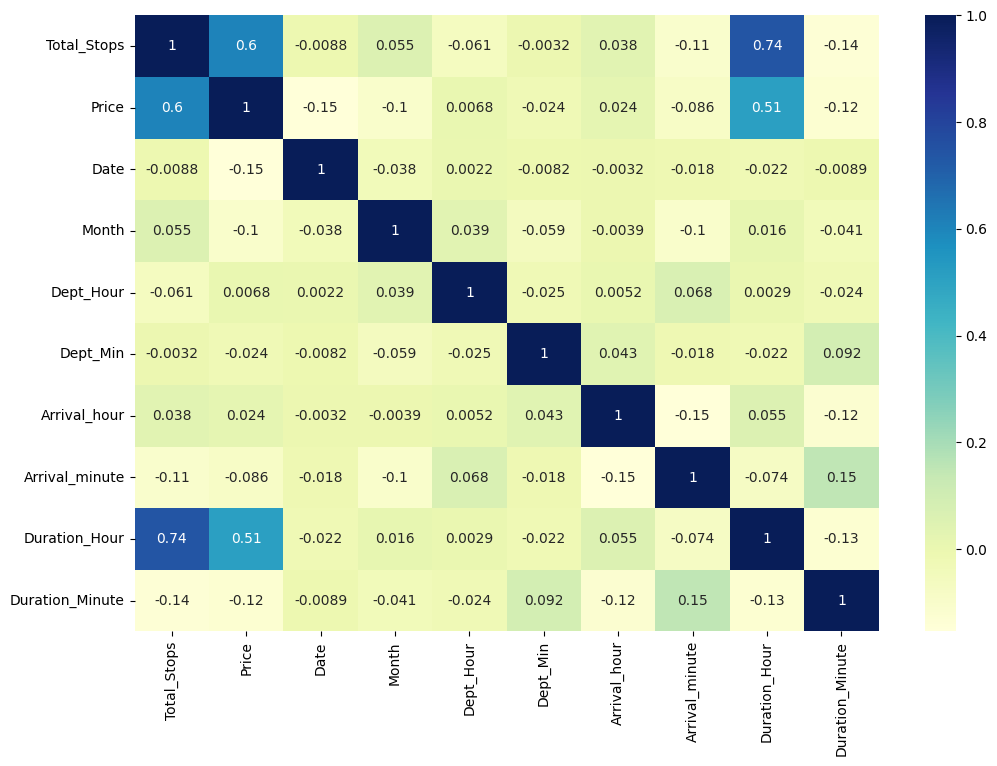

In [86]:
#Correlation between dependent and independent features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu');
#towards blue highly correlated, towards yellowish negatively correlated

In [87]:
#pip install scikit-learn

In [88]:
#Important feature using ExtraTreesRegressor
#if two independent features are highly correlated 80-90% then we can drop one of the independent feature because both are doing same task.
from sklearn.ensemble import ExtraTreesRegressor
Selection=ExtraTreesRegressor()
Selection.fit(x,y)

ExtraTreesRegressor()

In [89]:
print(Selection.feature_importances_)

[2.68366964e-01 1.44995173e-01 5.35346172e-02 2.40940441e-02
 2.12455734e-02 2.80348169e-02 1.95715536e-02 1.01756954e-01
 1.71809416e-02 9.20061852e-03 1.36143324e-03 1.47748536e-02
 1.30478514e-01 6.64372428e-02 2.11936281e-02 9.43558094e-04
 2.43634158e-03 1.09757677e-04 5.54941785e-03 9.18837634e-05
 3.91204771e-04 5.41853906e-03 2.84454883e-03 6.11388278e-03
 9.11798458e-03 1.44485561e-02 5.01566948e-03 3.90471212e-04
 2.49012557e-02]


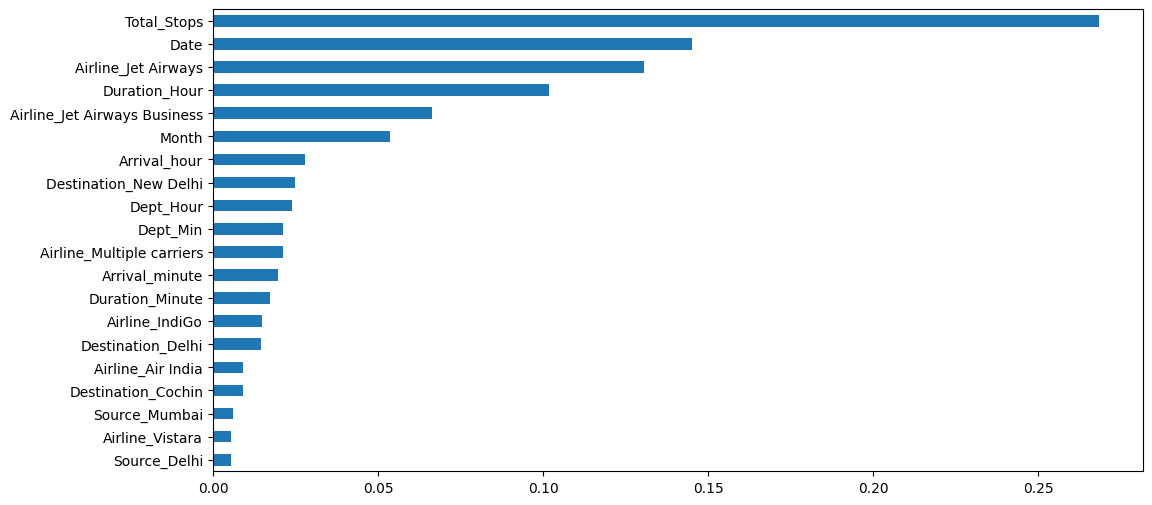

In [90]:
#plot graph of feature importances for better visualization
plt.figure(figsize=(12,6))
pd.Series(Selection.feature_importances_, index=x.columns).nlargest(20).plot(kind='barh').invert_yaxis();

Fitting Model using Random Forest,scaling is not done in random forest
in regression,check RSME score

In [91]:
#data split test 20%,training 80%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [92]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [93]:
y_pred = reg_rf.predict(x_test)

In [94]:
reg_rf.score(x_train, y_train)

0.9556622993328362

In [95]:
reg_rf.score(x_test, y_test)

0.8130291919707815

/var/folders/l_/90186wzj7s70kbqwql25xvtw0000gn/T/ipykernel_25253/3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


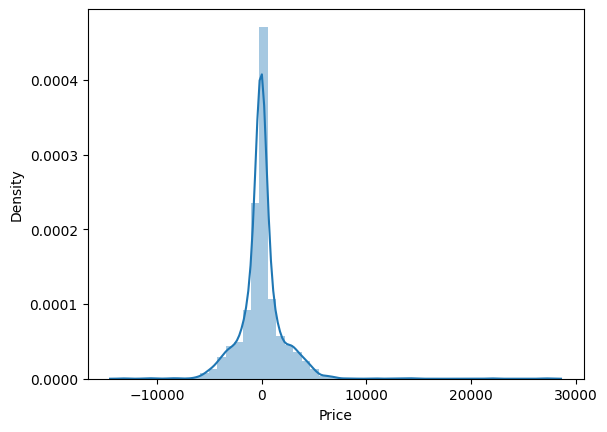

In [96]:
sns.distplot(y_test-y_pred)
plt.show()

gaussian distribution.so our result is good.

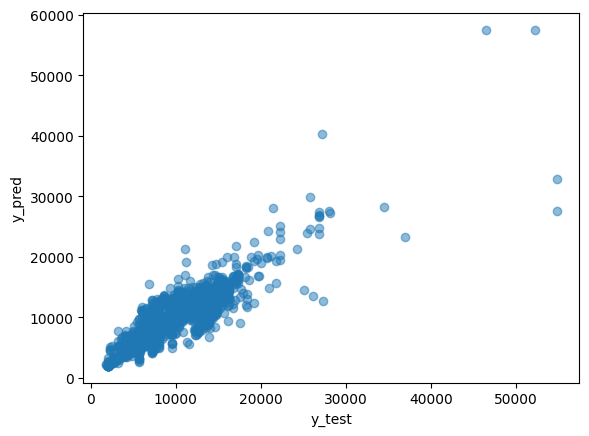

In [97]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [98]:
from sklearn import metrics

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1240.6251481274405
MSE: 4386928.782781645
RMSE: 2094.4996497449324


In [100]:
metrics.r2_score(y_test, y_pred)

0.8130291919707815

In [101]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [103]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [104]:
y_prediction = forest.predict(x_test)

In [105]:
metrics.r2_score(y_test, y_prediction)

0.8130291919707815